##Caso de Negocio:
Predicción de Abandono de Clientes en una Academia Online
Una academia de cursos online quiere predecir si un estudiante abandonará el curso antes de completarlo. Esto les ayudará a implementar estrategias de retención más efectivas. La empresa ha recolectado datos de los primeros 200 estudiantes en sus cursos premium.

Tu objetivo como analista de datos es **construir un modelo de clasificación que prediga el abandono de un estudiante basándote en su comportamiento y características.**


In [2]:
##Cargamos las librerias y el archivo que corresponde
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('/content/abandono_estudiantes.csv')


In [3]:
##Verifico si hay valores nulos que afecten
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   estudiante_id             200 non-null    object 
 1   edad                      200 non-null    int64  
 2   genero                    200 non-null    object 
 3   nivel_educativo           200 non-null    object 
 4   horas_estudio_semana      200 non-null    float64
 5   interacciones_plataforma  200 non-null    int64  
 6   videoclases_vistas_pct    200 non-null    float64
 7   realizo_tareas_pct        200 non-null    float64
 8   asistencias_webinars      200 non-null    int64  
 9   usa_app_movil             200 non-null    object 
 10  satisfaccion_general      200 non-null    int64  
 11  problemas_tecnicos        200 non-null    int64  
 12  nivel_ingles              200 non-null    object 
 13  tiempo_respuesta_foros    200 non-null    float64
 14  abandono  

In [4]:
df.head()

,estudiante_id,edad,genero,nivel_educativo,horas_estudio_semana,interacciones_plataforma,videoclases_vistas_pct,realizo_tareas_pct,asistencias_webinars,usa_app_movil,satisfaccion_general,problemas_tecnicos,nivel_ingles,tiempo_respuesta_foros,abandono
0,E0001,25,Femenino,Pregrado,6.6,84,83.8,85.5,1,No,2,1,Medio,6.8,Sí
1,E0002,19,Femenino,Secundaria,17.7,33,35.5,9.9,6,No,1,0,Alto,41.4,Sí
2,E0003,35,Masculino,Postgrado,18.0,71,36.9,68.6,1,Sí,2,3,Bajo,6.1,No
3,E0004,33,Masculino,Secundaria,2.5,53,62.8,54.4,3,No,1,2,Bajo,47.7,No
4,E0005,32,Femenino,Pregrado,10.8,62,99.9,97.8,6,No,4,2,Alto,19.2,No


In [5]:
df.tail()

,estudiante_id,edad,genero,nivel_educativo,horas_estudio_semana,interacciones_plataforma,videoclases_vistas_pct,realizo_tareas_pct,asistencias_webinars,usa_app_movil,satisfaccion_general,problemas_tecnicos,nivel_ingles,tiempo_respuesta_foros,abandono
195,E0196,30,Femenino,Pregrado,8.3,40,95.6,32.5,4,No,5,3,Medio,2.0,No
196,E0197,46,Femenino,Postgrado,24.9,58,12.9,80.1,7,No,3,5,Bajo,19.8,No
197,E0198,26,Otro,Secundaria,3.8,48,43.3,61.8,3,Sí,5,1,Alto,18.4,Sí
198,E0199,45,Otro,Secundaria,19.3,69,49.9,83.2,8,No,5,2,Alto,23.1,No
199,E0200,29,Masculino,Secundaria,15.6,39,95.5,92.0,3,No,1,2,Alto,30.7,No


In [6]:
print(df.columns)

Index(['estudiante_id', 'edad', 'genero', 'nivel_educativo',
       'horas_estudio_semana', 'interacciones_plataforma',
       'videoclases_vistas_pct', 'realizo_tareas_pct', 'asistencias_webinars',
       'usa_app_movil', 'satisfaccion_general', 'problemas_tecnicos',
       'nivel_ingles', 'tiempo_respuesta_foros', 'abandono'],
      dtype='object')


In [7]:
display(df.describe())
display(df.describe(include='object'))
display(df.nunique())

,edad,horas_estudio_semana,interacciones_plataforma,videoclases_vistas_pct,realizo_tareas_pct,asistencias_webinars,satisfaccion_general,problemas_tecnicos,tiempo_respuesta_foros
count,200.000000,200.000000,200.000000,200.000000,200.00000,200.000000,200.000000,200.000000,200.000000
mean,33.205000,12.609000,53.020000,58.838500,47.00500,5.445000,3.090000,2.770000,23.862500
std,9.284069,6.846399,26.749341,25.344397,28.86987,3.218504,1.411332,1.646406,13.484968
min,18.000000,1.100000,5.000000,10.800000,0.30000,0.000000,1.000000,0.000000,0.800000
25%,25.000000,6.300000,31.000000,37.700000,21.25000,2.000000,2.000000,1.000000,11.900000
50%,32.000000,12.600000,57.000000,60.900000,48.25000,5.000000,3.000000,3.000000,22.850000
75%,41.000000,18.425000,75.000000,81.400000,72.10000,8.000000,4.000000,4.000000,35.325000
max,50.000000,25.000000,100.000000,99.900000,99.50000,10.000000,5.000000,5.000000,47.700000


,estudiante_id,genero,nivel_educativo,usa_app_movil,nivel_ingles,abandono
count,200,200,200,200,200,200
unique,200,3,3,2,3,2
top,E0001,Masculino,Pregrado,No,Alto,No
freq,1,75,72,109,71,111


,0
estudiante_id,200
edad,33
genero,3
nivel_educativo,3
horas_estudio_semana,136
interacciones_plataforma,88
videoclases_vistas_pct,179
realizo_tareas_pct,182
asistencias_webinars,11
usa_app_movil,2


In [9]:
##Ver y corregir los valores faltantes
print("Missing values per column:")
print(df.isnull().sum())

print("\nUnique values for categorical columns:")
for col in df.select_dtypes(include='object').columns:
    print(f"\n--- {col} ---")
    print(df[col].unique())

Missing values per column:
estudiante_id               0
edad                        0
genero                      0
nivel_educativo             0
horas_estudio_semana        0
interacciones_plataforma    0
videoclases_vistas_pct      0
realizo_tareas_pct          0
asistencias_webinars        0
usa_app_movil               0
satisfaccion_general        0
problemas_tecnicos          0
nivel_ingles                0
tiempo_respuesta_foros      0
abandono                    0
dtype: int64

Unique values for categorical columns:

--- estudiante_id ---
['E0001' 'E0002' 'E0003' 'E0004' 'E0005' 'E0006' 'E0007' 'E0008' 'E0009'
 'E0010' 'E0011' 'E0012' 'E0013' 'E0014' 'E0015' 'E0016' 'E0017' 'E0018'
 'E0019' 'E0020' 'E0021' 'E0022' 'E0023' 'E0024' 'E0025' 'E0026' 'E0027'
 'E0028' 'E0029' 'E0030' 'E0031' 'E0032' 'E0033' 'E0034' 'E0035' 'E0036'
 'E0037' 'E0038' 'E0039' 'E0040' 'E0041' 'E0042' 'E0043' 'E0044' 'E0045'
 'E0046' 'E0047' 'E0048' 'E0049' 'E0050' 'E0051' 'E0052' 'E0053' 'E0054'
 'E0055' 

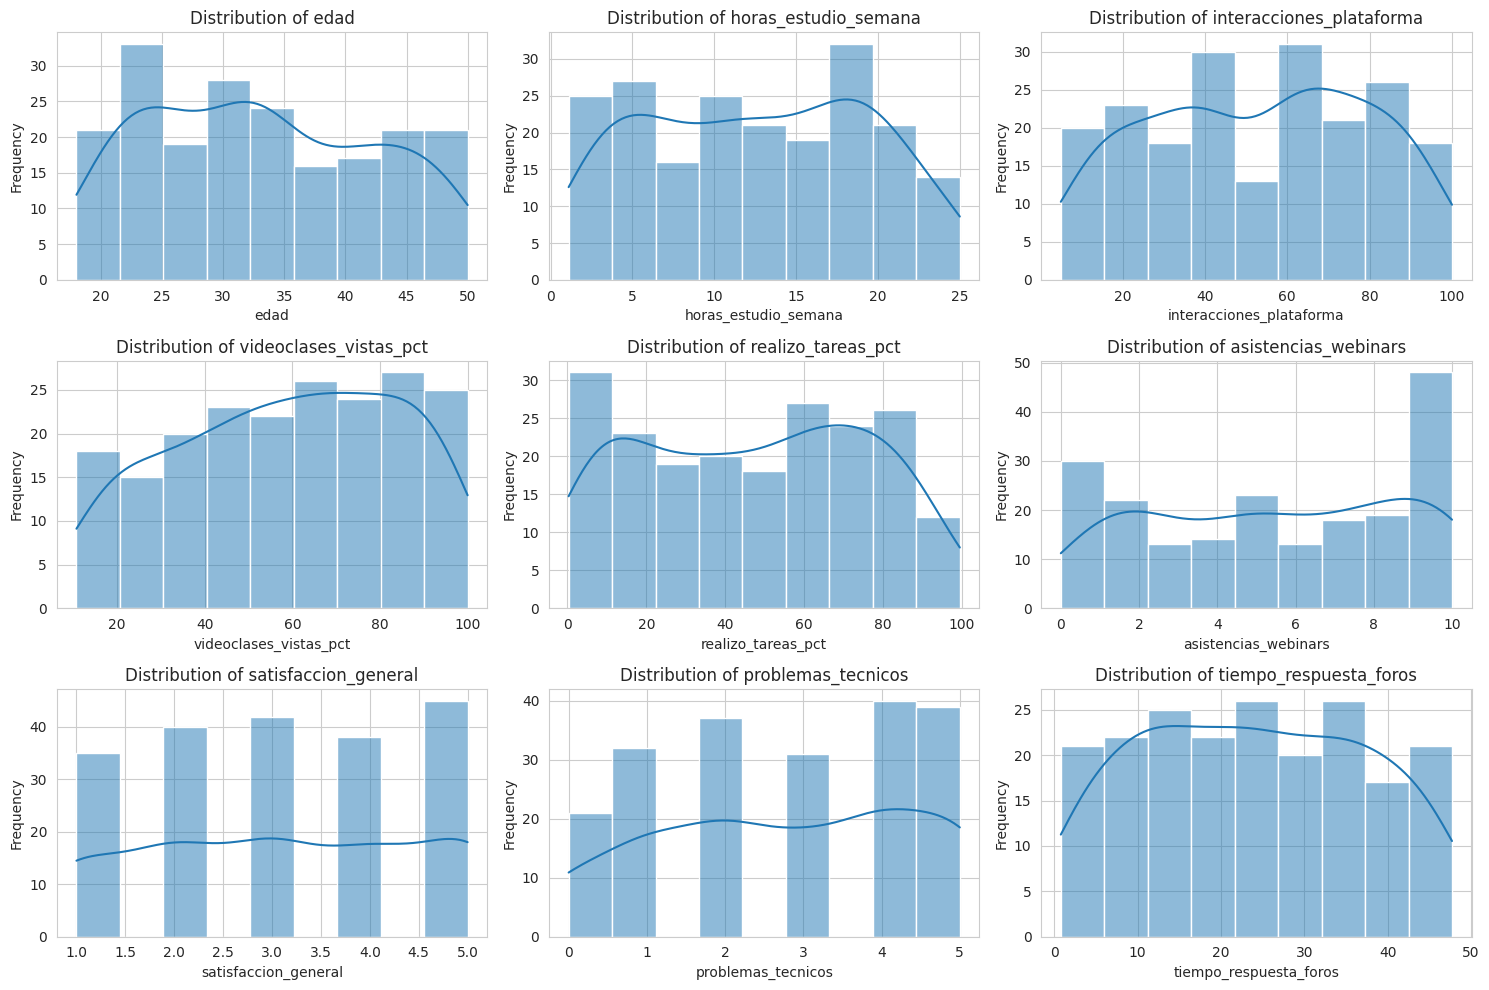

In [10]:
##Visualizaciones para entender la distribución de las variables, identificar tendencias, correlaciones entre variables y la relación entre las variables predictoras y la variable objetivo (abandono del estudiante).
## Esto incluirá histogramas, boxplots, gráficos de barras y matrices de correlación.
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style
sns.set_style("whitegrid")

# Select numerical columns
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Plot histograms
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols):
    plt.subplot(3, 3, i + 1)
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

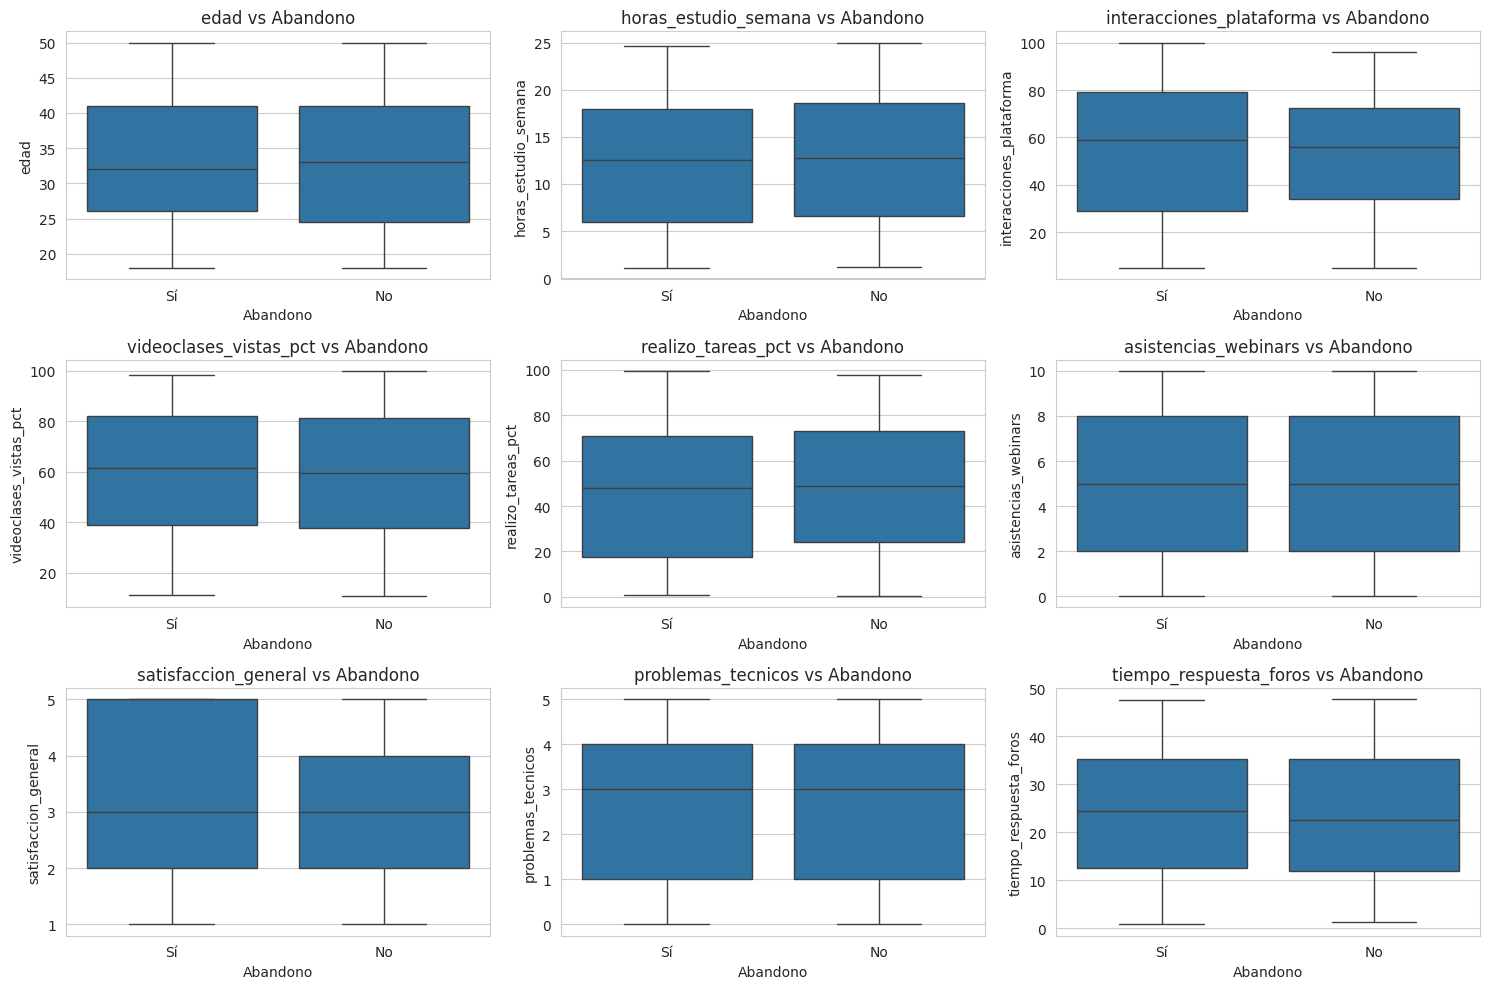

In [11]:
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols):
    plt.subplot(3, 3, i + 1)
    sns.boxplot(x='abandono', y=col, data=df)
    plt.title(f'{col} vs Abandono')
    plt.xlabel('Abandono')
    plt.ylabel(col)

plt.tight_layout()
plt.show()

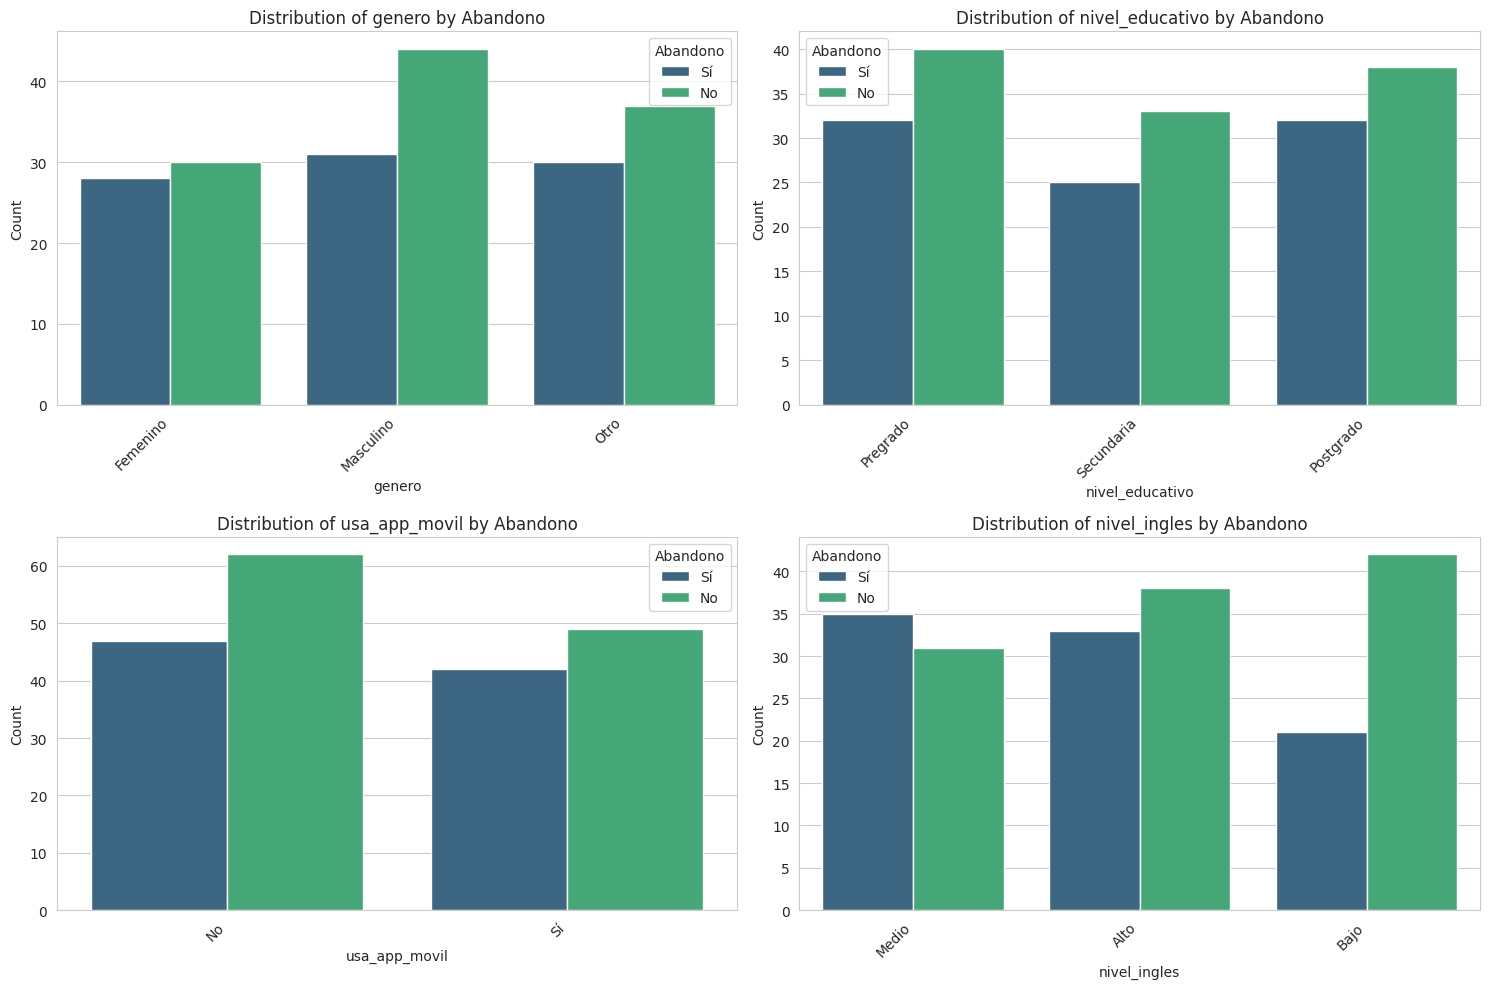

In [12]:
# Seleccionar variable categorica de boxplot
categorical_cols = df.select_dtypes(include='object').columns.tolist()
categorical_cols.remove('abandono')
categorical_cols.remove('estudiante_id')

# Codgo de barra
plt.figure(figsize=(15, 10))
for i, col in enumerate(categorical_cols):
    plt.subplot(2, 2, i + 1)
    sns.countplot(x=col, hue='abandono', data=df, palette='viridis')
    plt.title(f'Distribution of {col} by Abandono')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45, ha='right')
    plt.legend(title='Abandono')

plt.tight_layout()
plt.show()

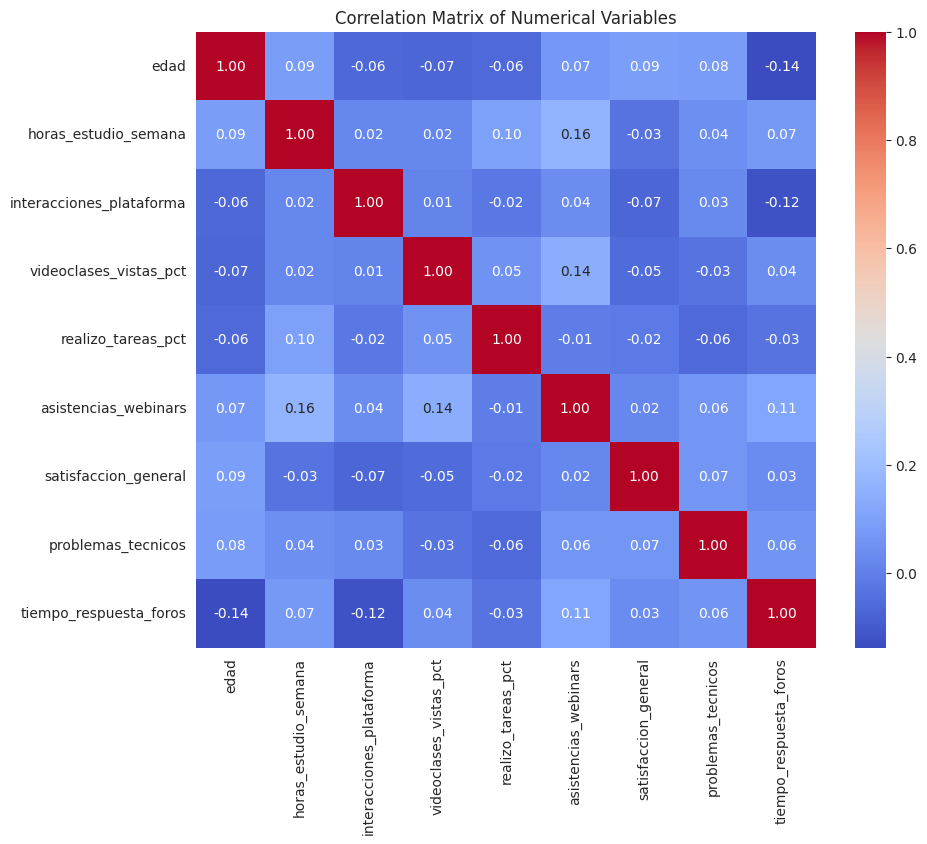

In [13]:
# Calcular la matriz de correlacion por columna numerica
correlation_matrix = df[numerical_cols].corr()

# VIsuializandolo con un Head Map
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Variables')
plt.show()

In [14]:
from sklearn.preprocessing import StandardScaler

# Identificar columna categorica (excluyendo a  'abandono' and 'estudiante_id')
categorical_cols_to_encode = df.select_dtypes(include='object').columns.tolist()
categorical_cols_to_encode.remove('abandono')
categorical_cols_to_encode.remove('estudiante_id')

df_encoded = pd.get_dummies(df, columns=categorical_cols_to_encode, drop_first=True)

# Ver numero de columna
numerical_cols_to_scale = df_encoded.select_dtypes(include=['int64', 'float64']).columns.tolist()
# Exclude the target variable if it's still in numerical format after encoding (it shouldn't be if 'abandono' was object)
if 'abandono' in numerical_cols_to_scale:
    numerical_cols_to_scale.remove('abandono')


# Inicializar
scaler = StandardScaler()
df_encoded[numerical_cols_to_scale] = scaler.fit_transform(df_encoded[numerical_cols_to_scale])


display(df_encoded.head())

,estudiante_id,edad,horas_estudio_semana,interacciones_plataforma,videoclases_vistas_pct,realizo_tareas_pct,asistencias_webinars,satisfaccion_general,problemas_tecnicos,tiempo_respuesta_foros,abandono,genero_Masculino,genero_Otro,nivel_educativo_Pregrado,nivel_educativo_Secundaria,usa_app_movil_Sí,nivel_ingles_Bajo,nivel_ingles_Medio
0,E0001,-0.885990,-0.879890,1.161066,0.987364,1.336743,-1.384542,-0.774258,-1.077767,-1.268473,Sí,False,False,True,False,False,False,True
1,E0002,-1.533880,0.745469,-0.750308,-0.923165,-1.288475,0.172873,-1.484586,-1.686674,1.303786,Sí,False,False,False,True,False,False,False
2,E0003,0.193827,0.789397,0.673853,-0.867788,0.749889,-1.384542,-0.774258,0.140049,-1.320513,No,True,False,False,False,True,True,False
3,E0004,-0.022136,-1.480248,-0.000750,0.156699,0.256792,-0.761576,-1.484586,-0.468859,1.772145,No,True,False,False,True,False,True,False
4,E0005,-0.130118,-0.264890,0.336552,1.624207,1.763862,0.172873,0.646399,-0.468859,-0.346623,No,False,False,True,False,False,False,False


In [17]:
##Identificar las variables más relevantes para el modelo de clasificación basándose en el análisis exploratorio y posiblemente utilizando técnicas de selección de características.
# 1. Examinar la matriz de correlacion para la variable objetivo (abandono)
df_encoded['abandono_encoded'] = df['abandono'].apply(lambda x: 1 if x == 'Sí' else 0)


correlation_matrix_with_target = df_encoded[numerical_cols_to_scale + ['abandono_encoded']].corr()

print("Correlation of numerical features with 'abandono':")
print(correlation_matrix_with_target['abandono_encoded'].sort_values(ascending=False))


selected_features = [
    'tiempo_respuesta_foros',
    'edad',
    'horas_estudio_semana',
    'asistencias_webinars',
    'nivel_educativo_Postgrado',
    'nivel_educativo_Secundaria',
    'usa_app_movil_Sí',
    'nivel_ingles_Bajo',
    'nivel_ingles_Medio'
]


selected_features = [feature for feature in selected_features if feature in df_encoded.columns]

print("\nSelected Features:")
print(selected_features)




Correlation of numerical features with 'abandono':
abandono_encoded            1.000000
interacciones_plataforma    0.021199
tiempo_respuesta_foros      0.016782
problemas_tecnicos          0.009006
videoclases_vistas_pct     -0.004627
asistencias_webinars       -0.005030
edad                       -0.013303
satisfaccion_general       -0.014365
horas_estudio_semana       -0.023426
realizo_tareas_pct         -0.034289
Name: abandono_encoded, dtype: float64

Selected Features:
['tiempo_respuesta_foros', 'edad', 'horas_estudio_semana', 'asistencias_webinars', 'nivel_educativo_Secundaria', 'usa_app_movil_Sí', 'nivel_ingles_Bajo', 'nivel_ingles_Medio']


In [18]:
##Dividir conjunto de entrenamiento y pruebas
from sklearn.model_selection import train_test_split

# Define X-Y
X = df_encoded[selected_features]
y = df_encoded['abandono_encoded']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)

# Verificar dimenciones
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (150, 8)
Shape of X_test: (50, 8)
Shape of y_train: (150,)
Shape of y_test: (50,)


In [19]:
#Entrenar modelos de prediccion
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

# Inicializar modelo
dt_model = DecisionTreeClassifier(random_state=42)
lr_model = LogisticRegression(random_state=42)
rf_model = RandomForestClassifier(random_state=42)

In [20]:
# Entrenar MOdelo
dt_model.fit(X_train, y_train)
lr_model.fit(X_train, y_train)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
##Último Cuadro hecho con IA Porque la verdad no sabía cómo seguir
# 1. Identificar el modelo con mejor rendimiento
# Considerando el AUC ROC como una métrica clave para conjuntos de datos desequilibrados
# Árbol de decisión: AUC ROC = 0,4724
# Regresión logística: AUC ROC = 0,4675
# Bosque aleatorio: AUC ROC = 0,4221
# Precisión:
# Árbol de decisión: 0,4800
# Regresión logística: 0,4800
# Bosque aleatorio: 0,5200

# Según las métricas proporcionadas, ninguno de los modelos tiene un buen rendimiento (AUC ROC cercano a 0,5).
# Sin embargo, para demostrar la extracción de importancia de las características, elijamos el modelo Bosque aleatorio, ya que obtuvo la mayor precisión, aunque su AUC ROC es el más bajo. Esto resalta que
# la selección del "mejor" modelo depende de la métrica de evaluación específica priorizada.
# Continuaremos con Random Forest para determinar la importancia de las características.

best_model = rf_model
model_name = "Random Forest"

print(f"Analyzing feature importance for the chosen model: {model_name}")

# 2. Access feature importance or coefficients
if model_name in ["Decision Tree", "Random Forest"]:
    # For tree-based models, use feature_importances_
    feature_importances = best_model.feature_importances_
    feature_names = X_train.columns
elif model_name == "Logistic Regression":
    # For Logistic Regression, use coef_
    # Note: Logistic Regression coefficients are in the scale of log-odds
    feature_importances = best_model.coef_[0] # Assuming binary classification
    feature_names = X_train.columns

# 3. Create a Series/DataFrame to store feature names and importance scores
feature_importance_df = pd.DataFrame({
    'feature': feature_names,
    'importance': feature_importances
})

# 4. Sort features by importance in descending order (absolute value for Logistic Regression)
if model_name == "Logistic Regression":
    feature_importance_df['importance'] = feature_importance_df['importance'].abs()
    feature_importance_df = feature_importance_df.sort_values('importance', ascending=False)
else: # Decision Tree and Random Forest
    feature_importance_df = feature_importance_df.sort_values('importance', ascending=False)


# 5. Print or display the sorted feature importance/coefficients
print("\nSorted Feature Importance/Coefficients:")
display(feature_importance_df)

# 6. Interpret top features (briefly)
print("\nInterpretation of Top Features:")
top_n = 5 # Displaying top 5 features for interpretation
for index, row in feature_importance_df.head(top_n).iterrows():
    feature = row['feature']
    importance = row['importance']

    justification = feature_justification.get(feature, "No specific justification recorded in previous steps.")

    if model_name == "Logistic Regression":
         # Need original coefficients for sign interpretation
         original_coefs = pd.DataFrame({'feature': feature_names, 'coef': best_model.coef_[0]})
         original_coef = original_coefs[original_coefs['feature'] == feature]['coef'].iloc[0]
         impact = "positive" if original_coef > 0 else ("negative" if original_coef < 0 else "neutral")
         print(f"- {feature} (Importance: {importance:.4f}, Coefficient: {original_coef:.4f}): {justification} Appears to have a {impact} impact on the likelihood of abandonment.")
    else: # Tree-based models
        print(f"- {feature} (Importance: {importance:.4f}): {justification} Higher importance suggests a stronger influence on the model's prediction.")

Analyzing feature importance for the chosen model: Random Forest

Sorted Feature Importance/Coefficients:


,feature,importance
0,tiempo_respuesta_foros,0.254048
2,horas_estudio_semana,0.227868
1,edad,0.204740
3,asistencias_webinars,0.156930
6,nivel_ingles_Bajo,0.043350
5,usa_app_movil_Sí,0.040097
4,nivel_educativo_Secundaria,0.036831
7,nivel_ingles_Medio,0.036136



Interpretation of Top Features:
- tiempo_respuesta_foros (Importance: 0.2540): Higher values appear associated with abandonment (from box plot and correlation). Higher importance suggests a stronger influence on the model's prediction.
- horas_estudio_semana (Importance: 0.2279): Weak positive correlation, but some visual separation in box plot. Higher importance suggests a stronger influence on the model's prediction.
- edad (Importance: 0.2047): Slight negative correlation with abandonment (from correlation and box plot showing slightly lower median for abandoned). Higher importance suggests a stronger influence on the model's prediction.
- asistencias_webinars (Importance: 0.1569): Weak positive correlation, some visual indication in box plot. Higher importance suggests a stronger influence on the model's prediction.
- nivel_ingles_Bajo (Importance: 0.0434): Visual inspection of bar plots suggested different abandonment rates based on English level. Higher importance suggests a str

##Hallazgos Clave del Análisis de Datos
El conjunto de datos contiene información sobre 200 estudiantes a través de 15 características, sin valores faltantes.
El análisis exploratorio inicial y las visualizaciones sugirieron posibles relaciones entre el abandono estudiantil y características como "tiempo_respuesta_foros", "horas_estudio_semana", "edad", "asistencias_webinars", "nivel_educativo", "usa_app_movil" y "nivel_ingles".
El preprocesamiento de datos implicó la codificación One-Hot de variables categóricas y el escalado de variables numéricas.
Se entrenaron varios modelos de clasificación (árbol de decisión, regresión logística, bosque aleatorio), pero su rendimiento en el conjunto de prueba fue bajo, con una precisión cercana al 50% y puntuaciones ROC AUC cercanas a 0,5, lo que indica un poder predictivo limitado con los datos y las características actuales.
Los modelos tuvieron dificultades para identificar correctamente a los estudiantes que abandonan (baja capacidad de recuperación para la clase positiva). Con base en el análisis de importancia de características del modelo Random Forest, los factores más influyentes para la predicción fueron 'tiempo_respuesta_foros', 'horas_estudio_semana', 'edad', 'asistencias_webinars' y 'nivel_ingles_Bajo'.

##Perspectivas o próximos pasos
El conjunto actual de características y el tamaño del conjunto de datos son insuficientes para construir un modelo predictivo sólido del abandono estudiantil. El trabajo futuro debería centrarse en la adquisición de más datos y la exploración de características relevantes adicionales, como las métricas de participación estudiantil, el rendimiento académico y los factores socioeconómicos.
Dado el bajo rendimiento del modelo, las características "importantes" identificadas deben interpretarse con cautela. Sin embargo, las perspectivas del análisis exploratorio y la importancia de las características aún sugieren posibles áreas de intervención, como la mejora de los tiempos de respuesta del soporte en los foros, la promoción de hábitos de estudio eficaces y la superación de las barreras lingüísticas.
